# Proyek Klasifikasi Gambar: [Multi-Class Nut Varieties]
- **Nama:** I Kadek Adi Memes Subagia
- **Email:** adimemes06@gmail.com
- **ID Dicoding:** adimemes

## Import Semua Packages/Library yang Digunakan

In [8]:
import io
import numpy as np
import os
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from google.colab import drive

## Data Preparation

### Data Loading

**Pengambilan Data**

Data yang digunakan disini adalah dataset yang berasal dari Kaggle, kemudian di simpan kedalam local komputer dan untuk memanggilnya disini menggunakan google drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset_path = '/content/drive/MyDrive/Multi-Class Nut Varieties'

### Data Preprocessing

#### Split Dataset

**Pembagian Dataset**

Tahapan ini adalah membagi dataset yang sudah dipanggil menjadi 3 yaitu train data, validation data dan test data

In [29]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    shuffle=True,
    subset="training",
    seed=42,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,
    shuffle=True,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)


test_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,
    shuffle=True,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

Found 2712 files belonging to 8 classes.
Using 2170 files for training.
Found 2712 files belonging to 8 classes.
Using 271 files for validation.
Found 2712 files belonging to 8 classes.
Using 271 files for validation.


Terlihat setelah running code di atas, ada informasi mengenai jumlah kelas yang ada dalam dataset dan jumlah data setelah dibagi baik itu di train data, validation ataupun test

## Modelling

Pada Pembuatan Model ini, menggunakan Transfer learning dan menggunakan model yaitu MobileNetV2

In [30]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,984 (9.24 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [31]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()

Pada Pembuatan Model ini dilakukan sebuah fungsi Callback yang berfungsi untuk mencegah terjadinya overfitting dimana akan memaksa berhenti train data jika akurasi sudah mencapai 95%

In [32]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=50,
    batch_size = 32,
    callbacks=[callbacks]
)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 432s 6s/step - accuracy: 0.6231 - loss: 1.1588 - val_accuracy: 0.8893 - val_loss: 0.3601
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.8959 - loss: 0.2999 - val_accuracy: 0.9114 - val_loss: 0.2598
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9176 - loss: 0.2289 - val_accuracy: 0.9114 - val_loss: 0.2365
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9422 - loss: 0.1801
Akurasi telah mencapai >95%!
68/68 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9423 - loss: 0.1799 - val_accuracy: 0.9225 - val_loss: 0.2166


## Evaluasi dan Visualisasi

**Hasil Trainning data**

setelah melatih data kemudian data yang didapatkan akan divisualisasikan mulai dari trainnging and validation acuuracy dan training and validation loss

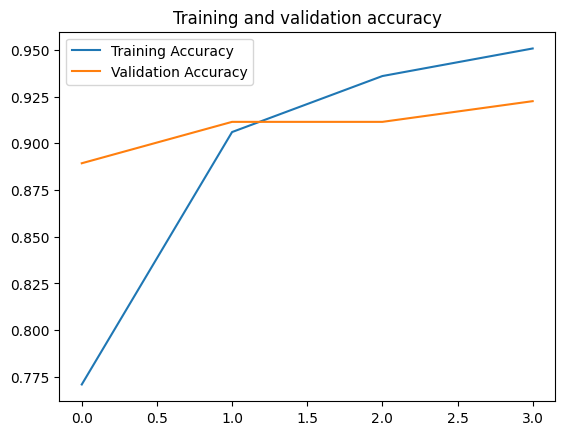

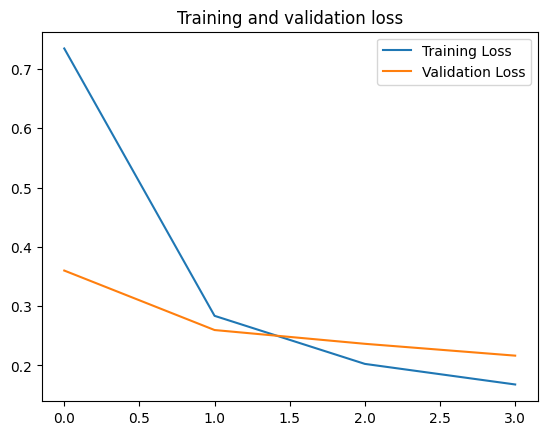

In [33]:

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc))


plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

Setelah mendapatkan hasil tersebut dicoba juga untuk testing data pada test data untuk mendapatkan hasilnya. <br>
dilihat dari hasil tersebut mendapatkan akurasi diatas 90% yaitu berada di 92% dengan loss berada di 2%

In [43]:
loss, accuracy = model.evaluate(test_data)

print('Test loss:', loss)
print('Test accuracy:', accuracy)


9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9248 - loss: 0.2007
Test loss: 0.21656206250190735
Test accuracy: 0.9225092530250549


**Matrik Evaluasi Klasifikasi** <br>
yaitu mencari hasil dari metrik evaluasi setiap kelas yang ada di dalam dataset.

In [44]:
import numpy as np

y_pred = []
y_true = []


for image_batch, label_batch in test_data:
    y_true.extend(label_batch.numpy())
    preds = model.predict(image_batch, verbose=0)
    y_pred.extend(preds)


y_true = np.array(y_true)
y_pred = np.array(y_pred)

predicted_categories = np.argmax(y_pred, axis=1)
true_categories = np.argmax(y_true, axis=1)

In [47]:
from sklearn.metrics import classification_report

class_names = test_data.class_names

print('\nHasil Metrik Evaluasi\n')
print(classification_report(true_categories, predicted_categories, target_names=class_names))


Hasil Metrik Evaluasi

                    precision    recall  f1-score   support

         almond_ak       1.00      0.94      0.97        32
  almond_kapadokya       0.93      0.93      0.93        42
      almond_nurlu       0.84      0.93      0.89        29
       almond_sıra       0.98      0.95      0.97        44
  chestnut_alandız       1.00      0.91      0.96        35
    chestnut_aydın       0.66      1.00      0.79        21
    chestnut_simav       0.97      1.00      0.98        32
chestnut_zonguldak       1.00      0.75      0.86        36

          accuracy                           0.92       271
         macro avg       0.92      0.93      0.92       271
      weighted avg       0.94      0.92      0.92       271



Hasil yaitu ada di atas dan menunjukan nilai yang bagus dalam evaluasi matrik

**Prediksi Gambar** <br>
pada tahapan ini adalah mencoba untuk melakukan prediksi dari gambar yang ada di datset untuk melihat apakah gambar yang di prediksi benar atau salah

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


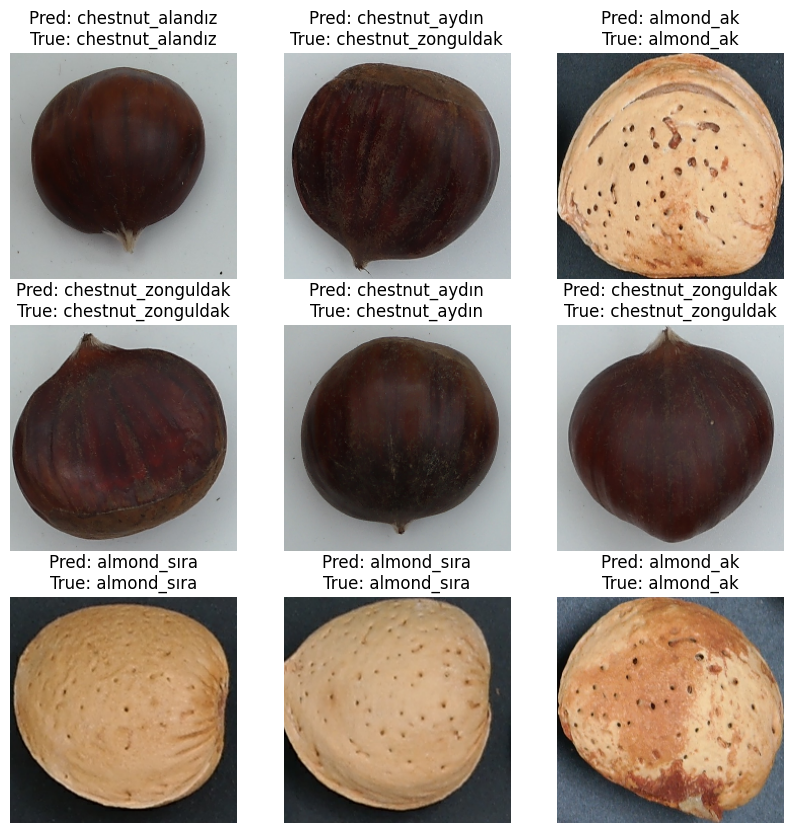

In [36]:
#Predict Values
class_name = train_data.class_names

plt.figure(figsize=(10, 10))

for images, labels in test_data.take(1):

    predictions = model.predict(images)

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_label = np.argmax(predictions[i])
        # Convert the one-hot encoded true_label tensor to an integer index
        true_label_index = tf.argmax(labels[i]).numpy()

        # Use the integer index to get the class name
        plt.title(f"Pred: {class_name[predicted_label]}\nTrue: {class_name[true_label_index]}")
        plt.axis("off")

## Konversi Model

Pada tahapan ini dilakukan beberapa tahapan konversi model yaitu:


1.   model.H5
2.   Tensorflow.js
3.   tensorflow.lite
4.   save model



**1. Model.h5**

In [37]:
model.save("model.h5")

**2. Tensorflow.js**

In [38]:
# Install tensorflowjs
!pip install tensorflowjs

# Convert model.h5 to model
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.33.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
2025-05-28 05:37:03.799969: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748410623.836741   30074 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attem

**3. Model Tf.lite**

In [40]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# Import the pathlib module
import pathlib

tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

187796

**Saved Model**

In [41]:
save_path = 'mymodel/'
tf.saved_model.save(model, save_path)

## Inference (Optional)